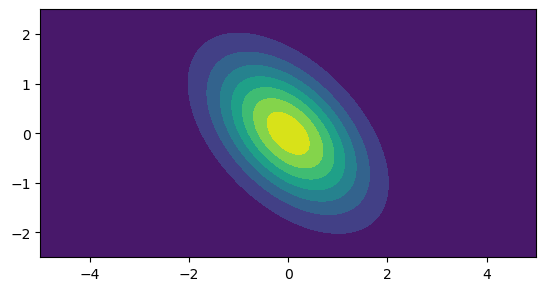

In [85]:
using PyPlot

function biv(x, y)
    m1, m2 = 0.0, -0.0
    s1, s2 = 4, 2
    cor = -0.5
    exp(-((x-m1)^2/s1^2+(y-m2)^2/s2^2-2*cor*(x-m1)*(y-m2)/s1/s2)/2/(1-cor^2))/2/π/s1/s2/sqrt(1-cor^2)
end

x = collect(-10:0.1:10)
y = collect(-10:0.1:10)

# To get covariance we need:
# 1. p(x) and p(y) alone, so margenalize (or profile) first, to get mean and sigma

z = [biv(i,j) for i in x, j in y]
zz = [biv(i,j) for i in x, j in y]

sx, sy = 4, 2
mx = x ./ sy
my = y ./ sx

plt.contourf(mx, my, z)
plt.xlim()
plt.axis("scaled")
plt.show()

In [60]:
my = transpose( sum(z, dims=1) )
mx = sum(z, dims=2)

mx = mx / sum(mx)
my = my / sum(my)

function meanV(x, mx)
    sum(x.*mx)
end

function variance(x, mx, mn)
    sum((x .- mn).^2 .*mx)
end

function covariance(x, y, mx, my, z)
    N = sum(z)
    sum((x .- mx).*transpose(y .- my).*z)/N
end

@show meanx = meanV(x, mx)
@show varx = sqrt( variance(x, mx, meanx) )
@show meany = meanV(y, my)
@show vary = sqrt( variance(y, my, meany) )

@show cov = covariance(x, y, meanx, meany, z)
@show cov2(x, y, meanx, meany)
@show cor = cov/varx/vary

#plt.plot(x, mx)
#plt.plot(y, my)
#plt.show()

meanx = meanV(x, mx) = 1.9999996011459507
varx = sqrt(variance(x, mx, meanx)) = 1.2299990201734246
meany = meanV(y, my) = -1.5999994421140304
vary = sqrt(variance(y, my, meany)) = 1.5999985263406982
cov = covariance(x, y, meanx, meany, z) = -1.8302366285601113
cov2(x, y, meanx, meany) = -183.02365116941593
cor = (cov / varx) / vary = -0.9299998842780473


-0.9299998842780473